In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

telco = pd.read_csv(r"/Users/Ray/downloads/jemison_spreadsheet_exercises - RDS - Table1_CustDetails.csv")

In [2]:
telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


In [3]:
telco.head(2).T

,0,1
customer_id,0002-ORFBO,0003-MKNFE
gender,Female,Male
is_senior_citizen,0,0
partner,Yes,No
dependents,Yes,No
phone_service,1,2
internet_service,1,1
contract_type,1,0
payment_type,Mailed check,Mailed check
monthly_charges,65.6,59.9


In [4]:
telco.gender.value_counts()

Male      3558
Female    3491
Name: gender, dtype: int64

In [5]:
telco.is_senior_citizen.value_counts()

0    5907
1    1142
Name: is_senior_citizen, dtype: int64

In [6]:
telco.partner.value_counts()

No     3642
Yes    3407
Name: partner, dtype: int64

In [7]:
telco.dependents.value_counts()

No     4934
Yes    2115
Name: dependents, dtype: int64

In [8]:
telco.customer_id.count()

7049

In [9]:
telco.groupby(["is_senior_citizen", "partner", "dependents", "contract_type", "churn"]).size()

is_senior_citizen  partner  dependents  contract_type  churn
0                  No       No          0              No       1051
                                                       Yes       783
                                        1              No        444
                                                       Yes        50
                                        2              No        378
                                                       Yes        14
                            Yes         0              No        134
                                                       Yes        66
                                        1              No         77
                                                       Yes         7
                                        2              No         67
                                                       Yes         2
                   Yes      No          0              No        304
                                          

In [71]:
telco.value_counts(["churn", "dependents", "partner"])


churn  dependents  partner
No     No          No         2158
       Yes         Yes        1504
       No          Yes        1233
Yes    No          No         1123
                   Yes         420
No     Yes         No          284
Yes    Yes         Yes         250
                   No           77
dtype: int64

In [67]:
telco.churn.value_counts()


No     5179
Yes    1870
Name: churn, dtype: int64

In [12]:
churned = len(telco[telco.churn == 'Yes'])
churned

1870

In [13]:
1870/telco.customer_id.count()


0.2652858561498085

In [14]:
len(telco[telco.churn == 'Yes'])/telco.customer_id.count()*100


26.528585614980848

In [15]:
first_month = telco.where(telco.tenure <= 1.9).sum()
first_month

/var/folders/bk/zhdff0zs3yz8v31x8wdnftxm0000gn/T/ipykernel_60929/129324774.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  first_month = telco.where(telco.tenure <= 1.9).sum()


is_senior_citizen      104.00
phone_service          762.00
internet_service       820.00
contract_type           38.00
monthly_charges      37451.30
total_charges        41960.55
tenure                 808.10
dtype: float64

In [64]:
telco.monthly_charges.sum()


456401.7

In [17]:
# how much revenue was lost after the first month from churners?
# now narrow it down to churners with no dependents, no partners.



In [18]:
round_tenure = telco.tenure.round(0)
round_tenure

0        9.0
1        9.0
2        4.0
3       13.0
4        3.0
        ... 
7044    14.0
7045    22.0
7046     2.0
7047    68.0
7048    63.0
Name: tenure, Length: 7049, dtype: float64

In [19]:
telco['round_tenure'] = telco.tenure.round(0)

In [20]:
count_per_tenure = telco.value_counts(round_tenure)
count_per_tenure

tenure
1.0     616
2.0     238
3.0     195
4.0     183
70.0    166
       ... 
75.0     12
0.0      11
77.0      5
76.0      3
79.0      1
Length: 79, dtype: int64

In [22]:
telco.value_counts(['customer_id']).sum()

7049

In [30]:
telco.groupby('round_tenure').churn.count().mean()

89.22784810126582

In [139]:
telco[telco.churn == 'Yes'].groupby('round_tenure').churn.count().mean()

25.27027027027027

In [93]:
telco[telco.churn == 'Yes'].groupby('round_tenure').monthly_charges.mean()

round_tenure
1.0      58.146335
2.0      65.665200
3.0      66.764045
4.0      69.476111
5.0      74.324074
           ...    
70.0     99.522727
71.0     87.116667
72.0     84.766667
73.0     75.166667
74.0    110.400000
Name: monthly_charges, Length: 74, dtype: float64

In [36]:
telco[telco.churn == 'Yes'].monthly_charges.mean()

74.41783422459888

In [77]:
telco[telco.churn == 'Yes'].monthly_charges.mean()*telco[telco.churn == 'Yes'].groupby('round_tenure').churn.count().mean()

1880.5587837837825

In [78]:
1152.93*12

13835.16

In [95]:
average_enemy = 25

In [96]:
average_most_enemy = 16

<AxesSubplot:>

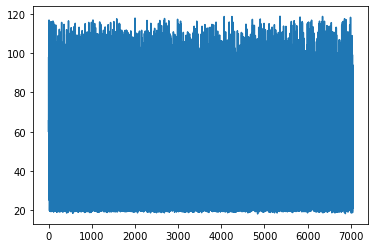

In [103]:
telco["monthly_charges"].plot()

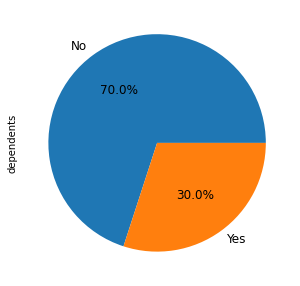

In [110]:
axis = (telco['dependents'].value_counts() * 100.0 / len(telco)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'] ,figsize =(5,5), fontsize = 12)

Text(0.5, 1.02, 'Count of Churned')

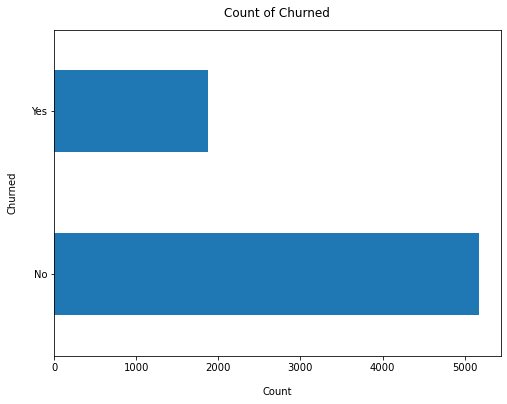

In [115]:
telco['churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Churned", labelpad=14)
plt.title("Count of Churned", y=1.02)

In [121]:
100*telco['churn'].value_counts()/len(telco['churn'])

No     73.471414
Yes    26.528586
Name: churn, dtype: float64

In [123]:
telco.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
 13  round_tenure       7049 non-null   float64
dtypes: float64(4), int64(4), object(6)
memory usage: 771.1+ KB


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


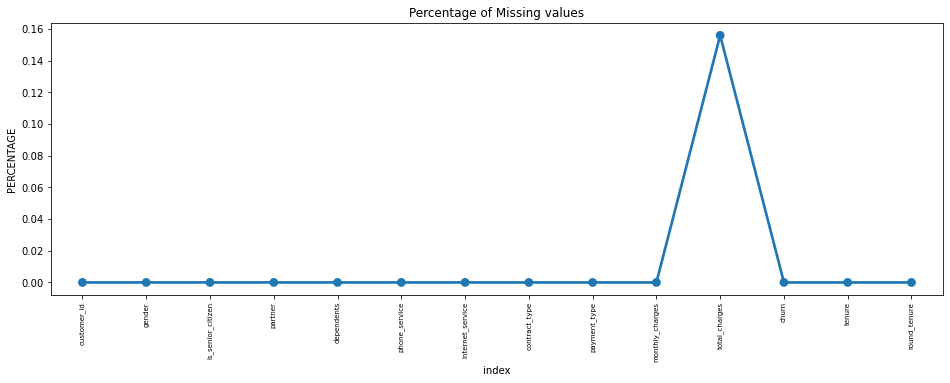

In [125]:
missing = pd.DataFrame((telco.isnull().sum())*100/telco.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [127]:
telco_data = telco.copy()

In [129]:
telco_data.total_charges = pd.to_numeric(telco_data.total_charges, errors='coerce')
telco_data.isnull().sum()

customer_id           0
gender                0
is_senior_citizen     0
partner               0
dependents            0
phone_service         0
internet_service      0
contract_type         0
payment_type          0
monthly_charges       0
total_charges        11
churn                 0
tenure                0
round_tenure          0
dtype: int64

In [131]:
telco_data.loc[telco_data ['total_charges'].isnull() == True]

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,round_tenure
945,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),56.05,NaN,No,0.0,0.0
1731,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,20.00,NaN,No,0.0,0.0
1906,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),61.90,NaN,No,0.0,0.0
2025,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,19.70,NaN,No,0.0,0.0
2176,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,20.25,NaN,No,0.0,0.0
2250,3213-VVOLG,Male,0,Yes,Yes,2,0,2,Mailed check,25.35,NaN,No,0.0,0.0
2855,4075-WKNIU,Female,0,Yes,Yes,2,1,2,Mailed check,73.35,NaN,No,0.0,0.0
3052,4367-NUYAO,Male,0,Yes,Yes,2,0,2,Mailed check,25.75,NaN,No,0.0,0.0
3118,4472-LVYGI,Female,0,Yes,Yes,0,1,2,Bank transfer (automatic),52.55,NaN,No,0.0,0.0
4054,5709-LVOEQ,Female,0,Yes,Yes,1,1,2,Mailed check,80.85,NaN,No,0.0,0.0


In [133]:
telco_data.dropna(how = 'any', inplace = True)
#telco_data.fillna(0)

In [134]:
print(telco_data['tenure'].max())

79.3


In [136]:
telco_data['tenure'].value_counts()

1.0     614
1.9      49
2.1      46
2.0      36
3.1      32
       ... 
75.0      1
79.3      1
37.4      1
75.7      1
76.5      1
Name: tenure, Length: 747, dtype: int64

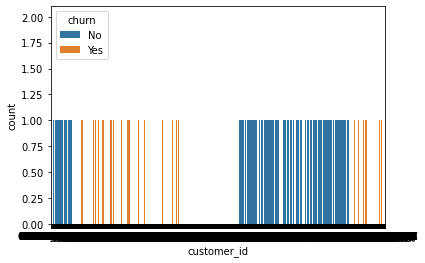

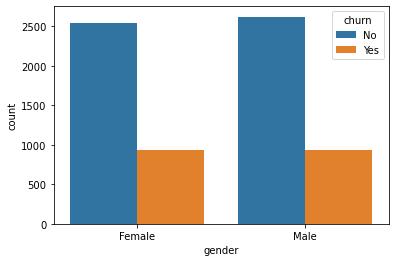

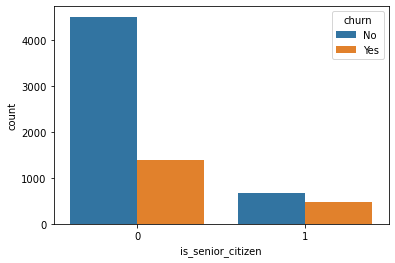

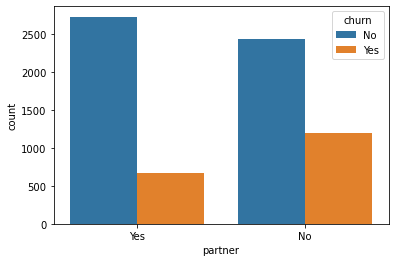

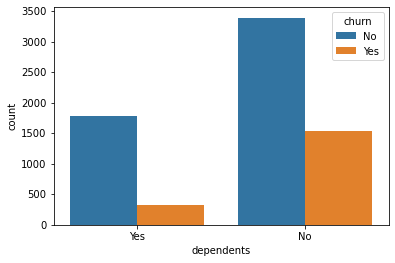

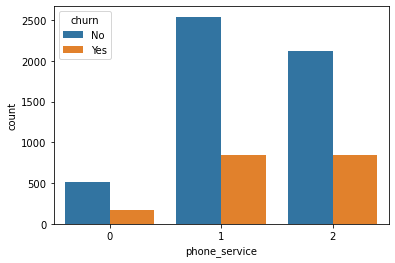

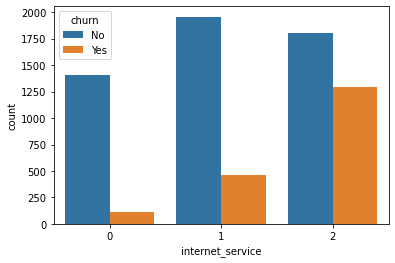

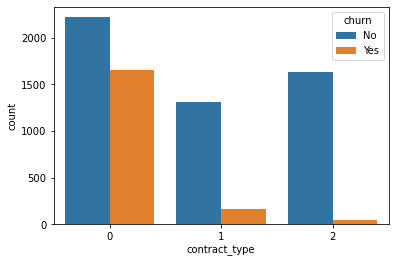

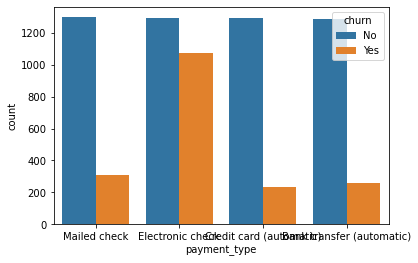

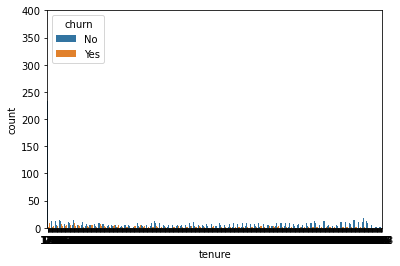

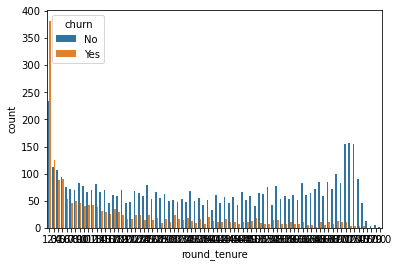

In [138]:
for i, predictor in enumerate(telco_data.drop(columns=['churn', 'total_charges', 'monthly_charges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='churn')